In [0]:
# !kill -9 -1

In [2]:
!pip install opencv-contrib-python

    100% |████████████████████████████████| 30.5MB 1.5MB/s 


In [79]:
from google.colab import files

uploaded = files.upload()

Saving maxresdefault.jpg to maxresdefault.jpg
Saving Rodney.jpg to Rodney.jpg
Saving texto.png to texto.png


In [0]:
# !wget https://www.dropbox.com/s/g8pjzv2de9gty8g/TextBoxes_icdar13.caffemodel

In [5]:
from google.colab import files

uploaded = files.upload()

Saving TextBoxes_icdar13.caffemodel to TextBoxes_icdar13.caffemodel


In [9]:
# !wget https://github.com/opencv/opencv_contrib/blob/master/modules/text/samples/textbox.prototxt

--2018-05-08 18:41:18--  https://github.com/opencv/opencv_contrib/blob/master/modules/text/samples/textbox.prototxt
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘textbox.prototxt’

textbox.prototxt        [ <=>                ] 359.31K  --.-KB/s    in 0.05s   

2018-05-08 18:41:19 (6.56 MB/s) - ‘textbox.prototxt’ saved [367936]



In [6]:
from google.colab import files

uploaded = files.upload()

Saving textbox.prototxt to textbox.prototxt


In [7]:
!ls

datalab       IMG_1960.JPG  IMG_2112.JPG  TextBoxes_icdar13.caffemodel
IMG_1815.JPG  IMG_2080.JPG  test_mio.jpg  textbox.prototxt


cropped/Rodney/
3 crops


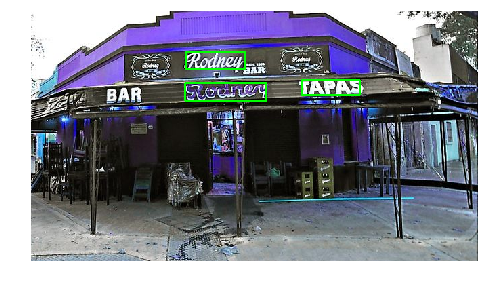

In [82]:
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np

def textdetector(file_name):

  new_dir = 'cropped/' + file_name[:-4] + '/'
  print(new_dir)
  if not os.path.exists(new_dir):
    os.makedirs(new_dir)

  img = cv2.imread(file_name)
  textSpotter = cv2.text.TextDetectorCNN_create("textbox.prototxt", "TextBoxes_icdar13.caffemodel")
  rects, outProbs = textSpotter.detect(img);
  vis = img.copy()
  thres = 0.6

  count = 0
  for r in range(np.shape(rects)[0]):
    if outProbs[r] > thres:
      rect = rects[r]
      
      cv2.rectangle(vis, (rect[0],rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 2)

      cropped = img[rect[1] :rect[1] +  rect[3] , rect[0] : rect[0] + rect[2]]
      cv2.imwrite( new_dir + str(count) + '.jpg' , cropped)
      count = count + 1

  print(str(count) + " crops")
  
  # Visualization
  plt.imshow(vis)
  plt.axis('off')
  plt.show()
  
  return count
  
file_name = 'Rodney.jpg'
n_crops = textdetector(file_name)

In [83]:
from IPython.display import Image
for i in range(n_crops):
  display(Image('cropped/' + file_name[:-4] +'/' + str(i) + '.jpg'))